In [11]:
pip install vaex

Note: you may need to restart the kernel to use updated packages.


In [12]:
import vaex
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

file_path = 'D:/OneDrive/Documents/Zahra_MS_Docs/CHI/Imp/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv'


In [13]:
file_path ='C:/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv'

In [14]:
vaex_df = vaex.from_csv(file_path, convert = True,
                        chunk_size=22_00_000)

In [15]:
type(vaex_df)

vaex.dataframe.DataFrameLocal

In [16]:
vaex_df = vaex.open('D:/OneDrive/Documents/Zahra_MS_Docs/CHI/Imp/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv.hdf5')
type(vaex_df)

vaex.dataframe.DataFrameLocal

In [17]:
#Selecting Illinois State

Illinios_state_df = vaex_df[vaex_df["res_state"] == "IL"]
Illinios_state_df.head(20)

#,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-08,IL,17.0,WILLIAMSON,17199.0,50 to 64 years,Missing,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
1,2020-07,IL,17.0,JERSEY,17083.0,18 to 49 years,Female,--,--,nan,0.0,Missing,Yes,Probable Case,Missing,No,Unknown,Unknown,--
2,2020-10,IL,17.0,MORGAN,17137.0,18 to 49 years,Female,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
3,2020-12,IL,17.0,CHAMPAIGN,17019.0,18 to 49 years,Male,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
4,2020-11,IL,17.0,FAYETTE,17051.0,18 to 49 years,Male,Missing,Hispanic/Latino,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2020-12,IL,17.0,MONTGOMERY,17135.0,0 - 17 years,Female,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Missing,--
16,2020-12,IL,17.0,MCDONOUGH,17109.0,18 to 49 years,Female,--,--,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
17,2020-10,IL,17.0,WOODFORD,17203.0,18 to 49 years,Female,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
18,2020-08,IL,17.0,WILL,17197.0,18 to 49 years,Female,Missing,Hispanic/Latino,nan,0.0,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,--


In [18]:
to_drop = ['case_positive_specimen_interval',
            'case_onset_interval',
            'process',
            'exposure_yn',
            'underlying_conditions_yn',
           'symptom_status',
          ]


Illinios_state_df.drop(to_drop, inplace=True)

#,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn
0,2021-08,IL,17.0,WILLIAMSON,17199.0,50 to 64 years,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
1,2020-07,IL,17.0,JERSEY,17083.0,18 to 49 years,Female,--,--,Probable Case,No,Unknown,Unknown
2,2020-10,IL,17.0,MORGAN,17137.0,18 to 49 years,Female,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
3,2020-12,IL,17.0,CHAMPAIGN,17019.0,18 to 49 years,Male,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
4,2020-11,IL,17.0,FAYETTE,17051.0,18 to 49 years,Male,Missing,Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,503,853",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes
"1,503,854",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Missing
"1,503,855",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes
"1,503,856",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes


## CORRELATION

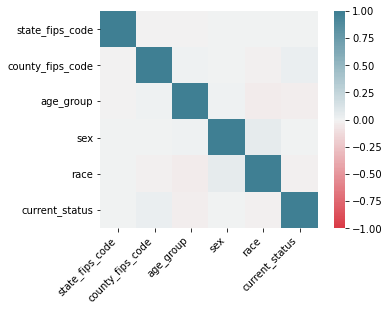

In [43]:
corr = df_pd.corr() 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#Does not come out to be much useful 

# LOGISTIC REGRESSION

In [19]:
Illinios_state_df.column_names

['case_month',
 'res_state',
 'state_fips_code',
 'res_county',
 'county_fips_code',
 'age_group',
 'sex',
 'race',
 'ethnicity',
 'current_status',
 'hosp_yn',
 'icu_yn',
 'death_yn']

Predicting variable will be: current_status; current_status can be either " labority confirmed case" or "probable case"

In [20]:
df_new = Illinios_state_df.dropna()

#csv = df_new.export_csv('covid.csv')
Exporting the dataframe local and converting it into the dataframe

In [21]:
df_pd = pd.read_csv('covid.csv')
type(df_pd)

pandas.core.frame.DataFrame

In [22]:
df_pd["sex"].unique()

array(['Missing', 'Female', 'Male', 'Unknown'], dtype=object)

In [23]:
#Combining the categories; 
df_pd['sex']=np.where(df_pd['sex'] =='Missing', 'Unknown', df_pd['sex'])

In [24]:
df_pd["race"].unique()

array(['Missing', 'White', 'Unknown', 'American Indian/Alaska Native',
       'Black', 'Asian', 'Multiple/Other',
       'Native Hawaiian/Other Pacific Islander'], dtype=object)

In [25]:
#Combining the Missing and Unknown
df_pd['race']=np.where(df_pd['race'] =='Missing', 'Unknown', df_pd['race'])

In [26]:
df_pd["ethnicity"].unique()

array(['Missing', 'Hispanic/Latino', 'Non-Hispanic/Latino', 'Unknown'],
      dtype=object)

In [27]:
#Combining the Missing and Unknown
df_pd['ethnicity']=np.where(df_pd['ethnicity'] =='Missing', 'Unknown', df_pd['ethnicity'])

In [28]:
df_pd['res_county'].unique()

array(['WILLIAMSON', 'MORGAN', 'CHAMPAIGN', 'ROCK ISLAND', 'DEKALB',
       'LASALLE', 'MCLEAN', 'KANKAKEE', 'WHITESIDE', 'TAZEWELL', 'DUPAGE',
       'LOGAN', 'KNOX', 'MONTGOMERY', 'WOODFORD', 'WILL', 'KANE',
       'KENDALL', 'JO DAVIESS', 'GRUNDY', 'SANGAMON', 'MONROE', 'BUREAU',
       'HENRY', 'ST. CLAIR', 'EFFINGHAM', 'CLINTON', 'MACON', 'WINNEBAGO',
       'COOK', 'BOONE', 'JEFFERSON', 'MCHENRY', 'OGLE', 'LEE', 'MADISON',
       'CHRISTIAN', 'PEORIA', 'FULTON', 'LIVINGSTON', 'MACOUPIN', 'ADAMS',
       'FAYETTE', 'LAKE', 'SHELBY', 'JERSEY', 'PERRY', 'IROQUOIS',
       'MCDONOUGH', 'SALINE', 'FRANKLIN', 'RANDOLPH', 'STEPHENSON',
       'MARION', 'COLES', 'JACKSON', 'VERMILION'], dtype=object)

In [29]:
df_pd['age_group'].value_counts()

18 to 49 years    246358
50 to 64 years     85300
65+ years          53197
0 - 17 years       52167
Missing              124
Name: age_group, dtype: int64

In [67]:
df_pd['case_month'].value_counts()

2020-11    104095
2020-12     65663
2020-10     65483
2021-01     41318
2021-04     23208
2021-03     18638
2021-08     18435
2020-09     18068
2020-08     16301
2021-07     16223
2021-02     13894
2020-07     10524
2021-05      7206
2020-05      6586
2020-04      5404
2020-06      3304
2021-06      1495
2020-03      1301
Name: case_month, dtype: int64

In [31]:
df_pd["current_status"].value_counts()

Laboratory-confirmed case    378201
Probable Case                 58945
Name: current_status, dtype: int64

### Data Exploration 

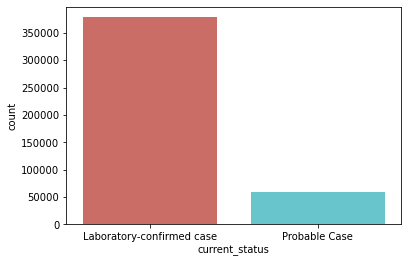

<Figure size 432x288 with 0 Axes>

In [32]:
sns.countplot(x= 'current_status', data = df_pd, palette = 'hls')
plt.show()
plt.savefig('count plot of current status variable') 

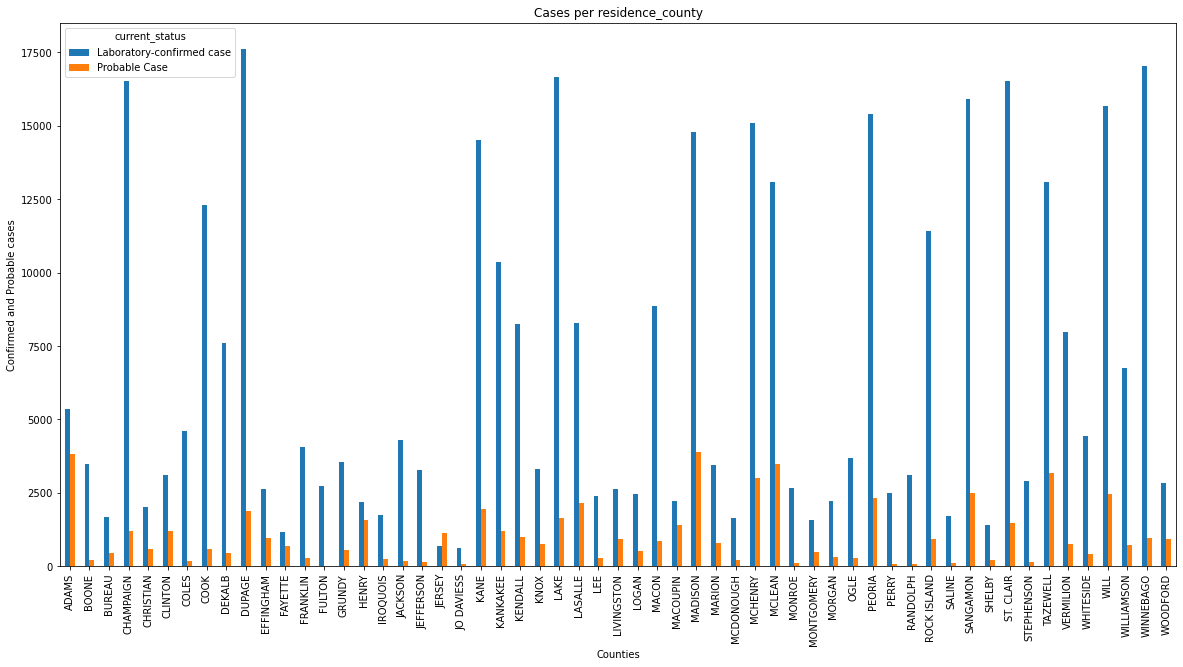

In [33]:
%matplotlib inline
#plt.figure(figsize=(100,100))
pd.crosstab(df_pd.res_county,df_pd.current_status).plot(kind='bar')
plt.gcf().set_size_inches(20, 10)
plt.title('Cases per residence_county')
plt.xlabel('Counties')
plt.ylabel('Confirmed and Probable cases')
plt.savefig('cases_freq_chart')

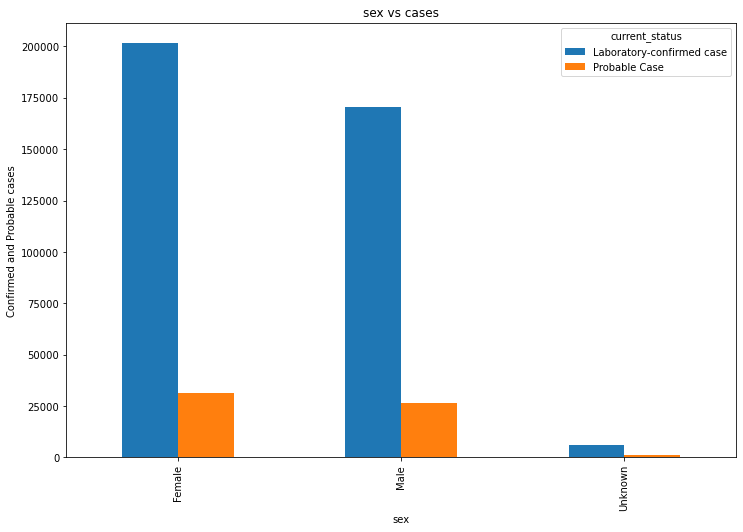

In [34]:
%matplotlib inline
#plt.figure(figsize=(100,100))
pd.crosstab(df_pd.sex,df_pd.current_status).plot(kind='bar')
plt.gcf().set_size_inches(12, 8)
plt.title('sex vs cases')
plt.xlabel('sex')
plt.ylabel('Confirmed and Probable cases')
plt.savefig('sex_and_cases_freq_chart')

#Unknowns are not that significant

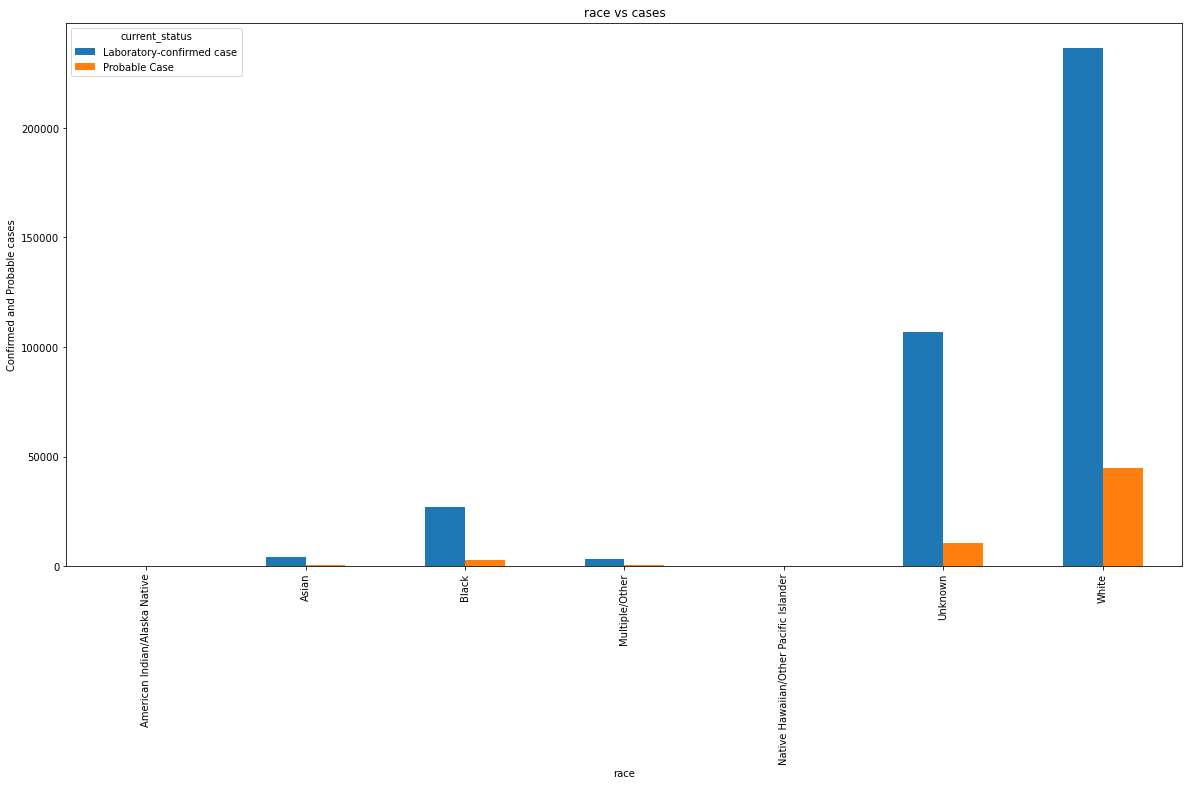

In [35]:
%matplotlib inline
#plt.figure(figsize=(100,100))
pd.crosstab(df_pd.race,df_pd.current_status).plot(kind='bar')
plt.gcf().set_size_inches(20, 10)
plt.title('race vs cases')
plt.xlabel('race')
plt.ylabel('Confirmed and Probable cases')
plt.savefig('race_and_cases_freq_chart')

#White are more affected than Black people. Unknown is also a significat number nut we cannot assume here 

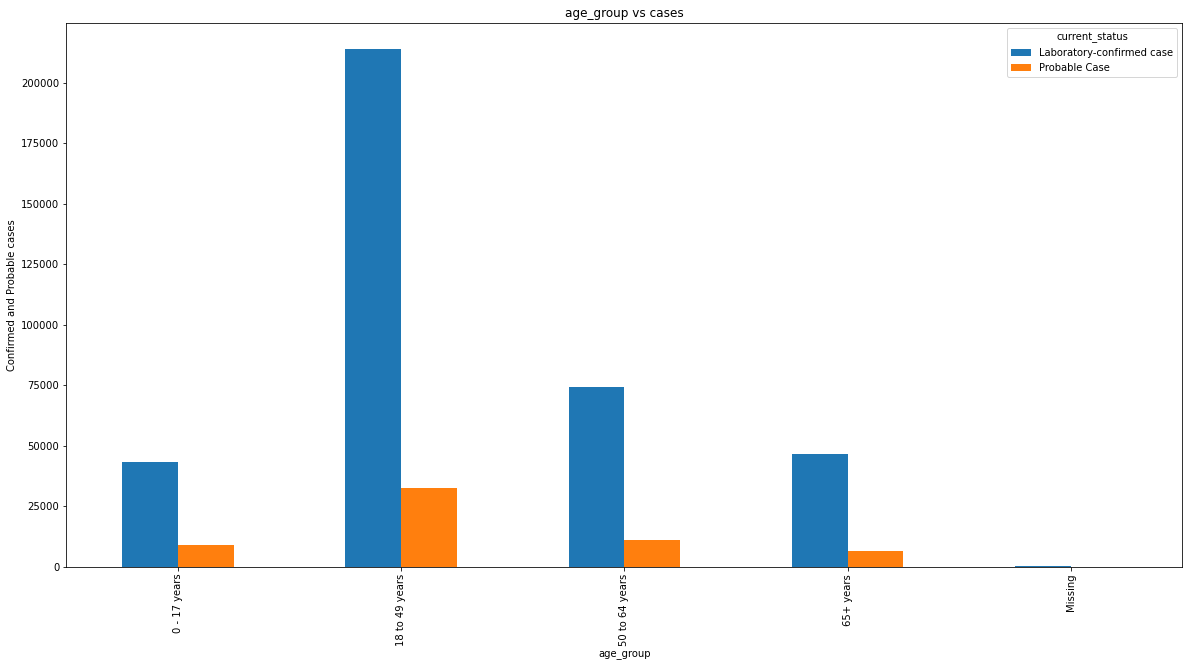

In [36]:
%matplotlib inline
#plt.figure(figsize=(100,100))
pd.crosstab(df_pd.age_group,df_pd.current_status).plot(kind='bar')
plt.gcf().set_size_inches(20, 10)
plt.title('age_group vs cases')
plt.xlabel('age_group')
plt.ylabel('Confirmed and Probable cases')
plt.savefig('age_and_cases_freq_chart')

#Good part is insiginificant 

In [37]:
df_gby = df_pd.groupby('res_county')["county_fips_code"]
df_gby.value_counts()
#county_fips_code are specific to each res_county

res_county   county_fips_code
ADAMS        17001.0              9158
BOONE        17007.0              3719
BUREAU       17011.0              2133
CHAMPAIGN    17019.0             17713
CHRISTIAN    17021.0              2599
CLINTON      17027.0              4317
COLES        17029.0              4773
COOK         17031.0             12882
DEKALB       17037.0              8050
DUPAGE       17043.0             19522
EFFINGHAM    17049.0              3581
FAYETTE      17051.0              1855
FRANKLIN     17055.0              4325
FULTON       17057.0              2753
GRUNDY       17063.0              4116
HENRY        17073.0              3748
IROQUOIS     17075.0              2005
JACKSON      17077.0              4485
JEFFERSON    17081.0              3438
JERSEY       17083.0              1841
JO DAVIESS   17085.0               675
KANE         17089.0             16469
KANKAKEE     17091.0             11542
KENDALL      17093.0              9243
KNOX         17095.0              

#### The columns I am moving ahead with are; age_group, county_fips_code, sex, race and case_month

Converting categorical columns into numerical 

In [38]:
df_pd['age_group'].replace(['18 to 49 years', '50 to 64 years','65+ years','0 - 17 years','Missing' ],
                        [0, 1,2,3,4], inplace=True)

In [39]:
df_pd['sex'].replace(['Unknown', 'Male','Female'],
                        [0, 1,2], inplace=True)

In [40]:
df_pd['race'].replace(['Unknown', 'White', 'American Indian/Alaska Native', 'Black',
       'Asian', 'Multiple/Other',
       'Native Hawaiian/Other Pacific Islander'],
                        [0, 1,2,3,4,5,6], inplace=True)

In [41]:
#Converting dependent variable, 1: Laboratort cases and 0 : probable cases

df_pd['current_status'].replace(['Laboratory-confirmed case',
'Probable Case'],
                        [1, 0], inplace=True)


In [52]:
df_pd["case_month"] = df_pd["case_month"].apply(pd.to_numeric)

ValueError: Unable to parse string "2021-08" at position 0

In [91]:
for i in range(len(df_pd['case_month'])):
    df_pd.index(i)['case_month'] = df_pd.index(i)['case_month'].replace("_", "")

TypeError: 'RangeIndex' object is not callable

In [42]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [48]:
X = df_pd[['case_month', 'age_group','county_fips_code','sex','race']]
y = df_pd[['current_status']]

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of probable cases in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of confirmed case",len(os_data_y[os_data_y['y']==1]))
print("Proportion of probable cases  in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of confirmed cases in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

ValueError: could not convert string to float: '2021-07'